# 시각화 탐색
## 필요 라이브러리 import

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

## 데이터셋 생성
- 팁 데이터셋 (tips)
레스토랑에 방문한 손님이 팁을 얼마나 주는지, 성별 흡연여부, 요일, 식사 시간, 식사 인원 등에 대한 정보를 가지고 있는 데이터셋

In [2]:
# tips 데이터 로드
data = sns.load_dataset('tips')

## 시각화 탐색
### 상자그림 ( boxplot )
사분위수를 계산하여, 최대/최소값을 벗어나는 이상값 시각화

In [3]:
# 백분위수 계산 ( percentile )
print(data['tip'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
print()

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['tip'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.4400
0.25    2.0000
0.50    2.9000
0.75    3.5625
0.95    5.1955
Name: tip, dtype: float64

     5.0%  25.0%  50.0%   75.0%   95.0%
tip  1.44    2.0    2.9  3.5625  5.1955


In [4]:
df

,tip
5.0%,1.4400
25.0%,2.0000
50.0%,2.9000
75.0%,3.5625
95.0%,5.1955


Text(0, 0.5, '달러($)')

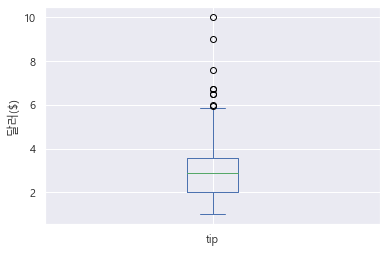

In [10]:
# 한 변수에 대한 이상값 시각화
ax = data['tip'].plot.box()
ax.set_ylabel('달러($)')

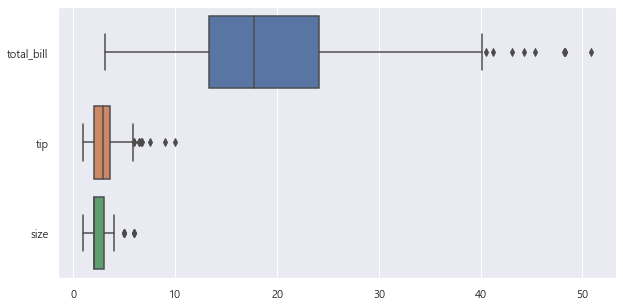

In [11]:
# 상자 그림을 이용한 전체 변수의 이상값 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, orient='h')
plt.show()

### 막대 그래프 ( Bar Chart )
사물의 양을 막대 모양의 길이로 나타낸 그래프(비교 시각화)

In [12]:
# 요일별 tip 비교
tips_sum_day = data.groupby('day').tip.sum()
tips_sum_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [20]:
data.groupby('day')['tip'].sum()

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [21]:
type(data.groupby('day').tip)

pandas.core.groupby.generic.SeriesGroupBy

<AxesSubplot:xlabel='sex', ylabel='tip'>

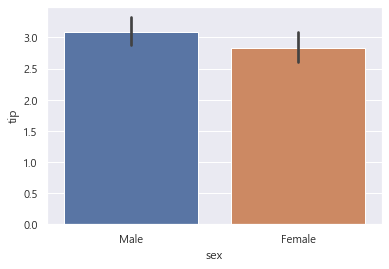

In [22]:
# Seaborn 막대 그래프 시각화
# 성별, 평균 팁 비교
sns.barplot(data= data, x='sex', y='tip')

<AxesSubplot:xlabel='sex', ylabel='tip'>

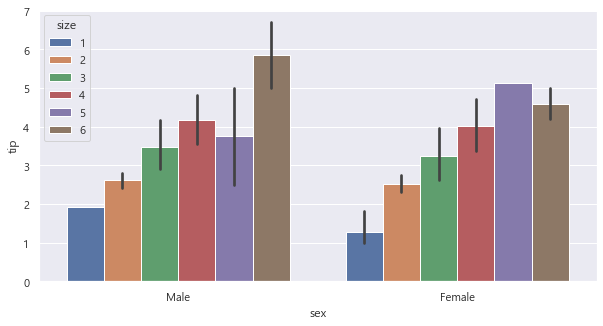

In [23]:
# 식사 인월(size)별 남성과 여성 tip 평균 비교
## 여러 열에서 집단 묶어서 세부 집단 시각화 ( hue )
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='sex', y='tip', hue='size')

### 도수분포표 & 히스토그램
pd.cut() : 연속된 수치를 구간으로 나누어 카테고리화할 때 사용

In [24]:
# 도수분포표
## 총 계산 금액 구간별 빈도수
bin_total = pd.cut(data['total_bill'], 8)    # data 를 8개 구간으로 잘라서 카테고리화
bin_total.value_counts()

(15.005, 20.972]    81
(9.038, 15.005]     68
(20.972, 26.94]     38
(26.94, 32.908]     24
(3.022, 9.038]      12
(32.908, 38.875]    10
(38.875, 44.842]     6
(44.842, 50.81]      5
Name: total_bill, dtype: int64

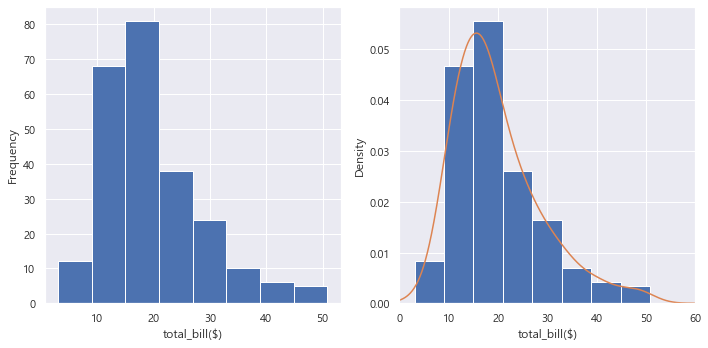

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# 히스토그램
## plt.style.use('ggplot')
ax1 = plt.subplot(1, 2, 1)
ax1 = data['total_bill'].plot.hist(bins=8)   # bins : 구간 수
ax1.set_xlabel('total_bill($)');

# 밀도 그림
# plt.style.use('seaborn')
ax2 = plt.subplot(1, 2, 2)
ax2 = data['total_bill'].plot.hist(density=True, xlim=[0, 60], bins=8)
data['total_bill'].plot.density(ax=ax2);
ax2.set_xlabel('total_bill($)');

plt.tight_layout()
plt.show()